# Capstone Project - Understanding & Predicting Bank Customer Churn:

## Background:
* This is a capstone project notebook for the course 'Imperial Business Analytics: From Data to Decisions'. 
* Dataset is taken from Kaggle and available at - https://www.kaggle.com/datasets/santoshd3/bank-customers?resource=download
* There is a limited description available for this dataset, however, the raw data headers are genrally informative. Data investigation will also be used to build a data dictionary but some assumptions may need to be applied. These will be clearly documented. 
* Problem statement is my own, formulated based on the dataset.


## Problem Statement:
* Bank 'X' is looking to reduce the numbers of customers that are leaving their business in order to retain revenue levels. 
* The bank wishes to understand more about the customers who have churned previously to assist them in preventing that from happening again in the future. 
* The ability to predict whether a given customer is likely to churn or not should help them here, as they might be able to market specific products or proivide them with assistance. 

## Assumptions:
* 'Balance' and 'EstiamtedSalary' attributes are in Euros based on the geography locations available.
* 'IsActiveMember' attribute is a dormancy flag. for the purposes of this analysis, it is whether the customer has used any bank product in the last six months. 


## Data Dictionary 

`RowNumber`: Row identifier, incremental number.   
`CustomerId`: Unique identifier for customer, 8 digit number.   
`Surname`: Surname of customer.   
`CreditScore`: Credit score of customer, 3 digit number.   
`Geography`: Customer country of residence.   
`Gender`: Customer gender.   
`Age`: Customer age in years.   
`Tenure`: Number of years customer has been with the bank.   
`Balance`: Customer bank balace at time of analysis in Euros.   
`NumOfProducts`: How many different products the customer holds with the bank.   
`HasCrCard`: Whether the customer has a credit card with the bank (1 = yes, 0 = no).   
`IsActiveMember`: Whether the customer actively used any of their bank products in the last six months (1 = yes, 0 = no).   
`EstimatedSalary`: The bank's salary prediction of that client in Euros.   
`Exited`: Whether or not the customer left the bank to join a competitor. Our target variable for Classification analysis.    

In [1]:
#package import
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
#pd.options.plotting.backend = "plotly"

from typing import Any, Optional

# data pre-processing:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#baseline dummy:
from sklearn.dummy import DummyClassifier

# clustering:
from sklearn.cluster import KMeans 
from sklearn.cluster import AgglomerativeClustering 
#hierarchical
#dbscan 

# classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC




C:\Users\DanWi\AppData\Local\Temp\ipykernel_46696\1606974557.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
#data import

#keep a raw copy of data:
raw_df = pd.read_csv("C:\projects\py_course_venv\capstone\\bank_churn_modelling.csv")

#create new df to complete analysis:
df = raw_df.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.shape

(10000, 14)

In [5]:
raw_df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

## Data Cleanup:

In [6]:
#drop rownumber: use index instead.
df.drop(columns="RowNumber", inplace=True)

#rename columns
df.rename(
    columns={
"CustomerId": "cust_id",
"Surname": "surname",
"CreditScore": "credit_score",
"Geography": "geography",
"Gender": "gender",
"Age": "age",
"Tenure": "tenure",
"Balance": "balance",
"NumOfProducts": "num_products",
"HasCrCard": "credit_card",
"IsActiveMember":  "active_member",
"EstimatedSalary": "est_salary",
"Exited": "exited"
},
    inplace=True
)

#set customer_id as object:
df['cust_id'] = df['cust_id'].astype('object')





In [7]:
#check for missing values:
df.isna().sum() #no missing values

#check for duplicates:
df.duplicated().sum() #no row duplicates

#check for duplicates on cust_id for data quality:
df['cust_id'].duplicated().sum() #no customer id duplicates

0

# Exploratory Data Analysis:

## Univariate Analysis:

In [8]:
#optionally use pandas profiling:
#prof_report = ProfileReport(df)
#prof_report

In [9]:
#check for erroneous values in numerical attributes:
df.describe().round(2)

credit_score       age    tenure    balance  num_products  credit_card  \
count      10000.00  10000.00  10000.00   10000.00      10000.00     10000.00   
mean         650.53     38.92      5.01   76485.89          1.53         0.71   
std           96.65     10.49      2.89   62397.41          0.58         0.46   
min          350.00     18.00      0.00       0.00          1.00         0.00   
25%          584.00     32.00      3.00       0.00          1.00         0.00   
50%          652.00     37.00      5.00   97198.54          1.00         1.00   
75%          718.00     44.00      7.00  127644.24          2.00         1.00   
max          850.00     92.00     10.00  250898.09          4.00         1.00   

       active_member  est_salary   exited  
count       10000.00    10000.00  10000.0  
mean            0.52   100090.24      0.2  
std             0.50    57510.49      0.4  
min             0.00       11.58      0.0  
25%             0.00    51002.11      0.0  
50%             1.00   100193.92      0.0  
75%             1.00   149388.25      0.0  
max             1.00   199992.48      1.0

In [10]:
df.nunique()

cust_id          10000
surname           2932
credit_score       460
geography            3
gender               2
age                 70
tenure              11
balance           6382
num_products         4
credit_card          2
active_member        2
est_salary        9999
exited               2
dtype: int64

In [11]:
# check unique values of columns for understanding
# exclude credit score, balance, age and est_salary due to number of unique values for these attributes.  

num_check_cols = ['tenure', 'num_products', 'credit_card', 'active_member', 'exited']

for i in num_check_cols:
    print(f"unique values for {i}: {df[i].unique()}")



unique values for tenure: [ 2  1  8  7  4  6  3 10  5  9  0]
unique values for num_products: [1 3 2 4]
unique values for credit_card: [1 0]
unique values for active_member: [1 0]
unique values for exited: [1 0]


Text(0, 0.5, 'Count of Customer')

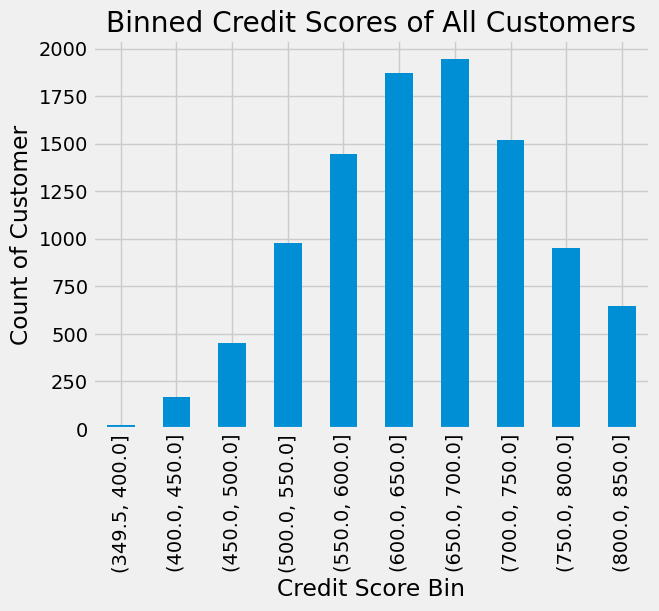

In [12]:
df['credit_score'].max() - df['credit_score'].min() 
mean_credit_score = df['credit_score'].mean()

#split into 10 bins of 50:
credit_scores = pd.cut(df['credit_score'], bins=10).value_counts().sort_index(ascending=True)

credit_bar = credit_scores.plot(kind='bar')
credit_bar.set_title('Binned Credit Scores of All Customers')
credit_bar.set_xlabel("Credit Score Bin")
credit_bar.set_ylabel("Count of Customer")

# normally distributed but with a slight right skew. Few outliers on the high and low range.  

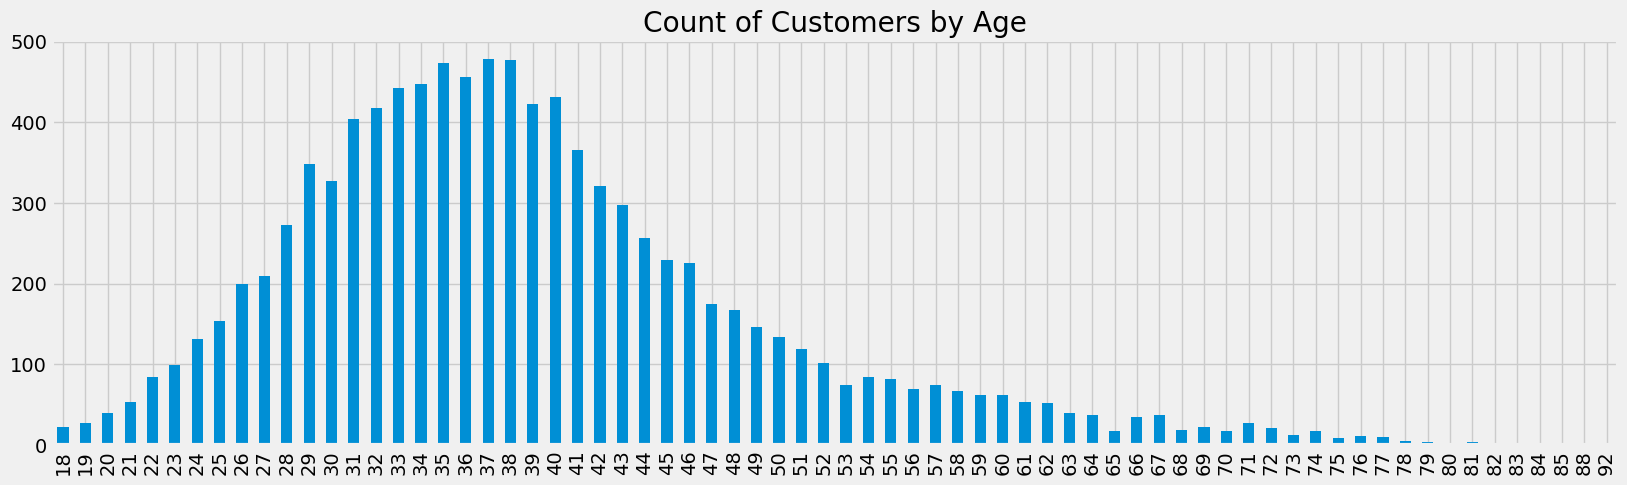

In [13]:
#age
df['age'].value_counts().sort_index().plot(kind='bar', figsize = (18, 5), title='Count of Customers by Age');

#again, normally distributed but with a left skew this time. 

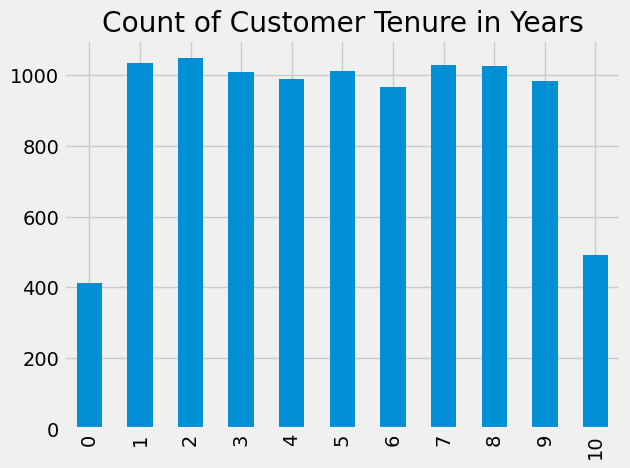

In [14]:
#tenure
df['tenure'].value_counts().sort_index().plot(kind='bar', title='Count of Customer Tenure in Years');
#tenure split fairly equally across years 1 to 9, with significantly less with less than one year tenure or ten years or more. 


The precentage of zero balance accounts in the dataset is 36.17%


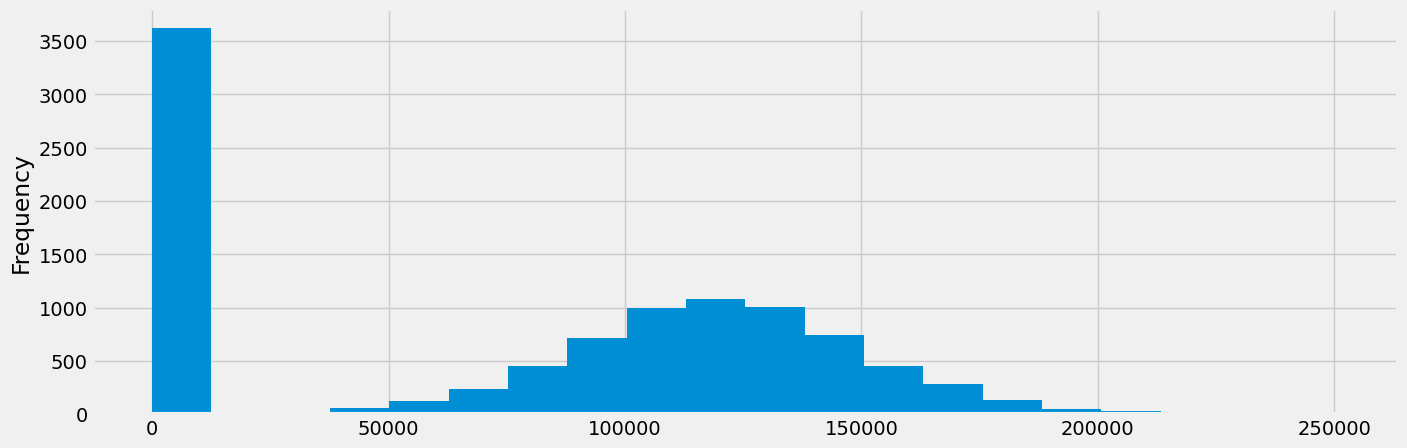

In [15]:
#balance
df['balance'].plot(kind='hist', figsize=(15, 5), bins=20);
# again fairly norally distributed if you exclude the amount of 0 balance accounts

zero_balance_perc = df['balance'].value_counts(normalize=True).loc[0.00]*100
print(f"The precentage of zero balance accounts in the dataset is {zero_balance_perc}%")

<AxesSubplot: xlabel='est_salary', ylabel='Count'>

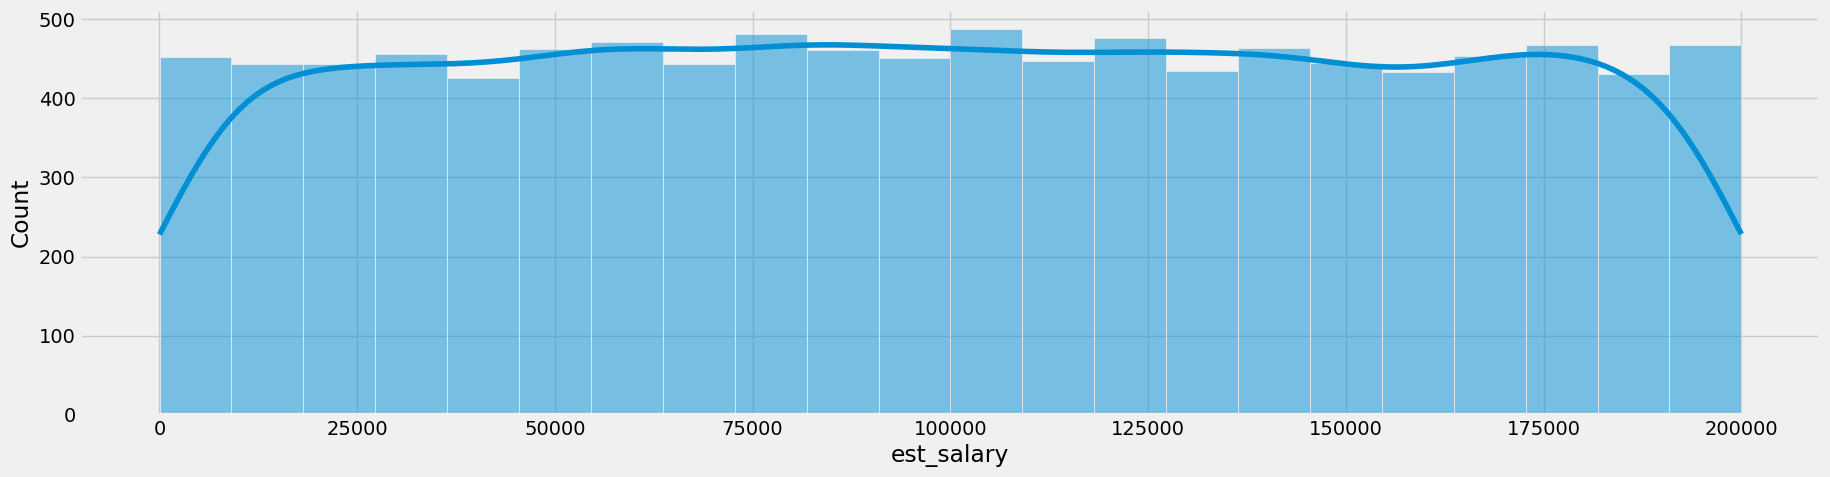

In [16]:
# est salary
plt.figure(figsize=(20,5))
sns.histplot(data=df, x="est_salary", kde=True)
# even distribution of salary values.

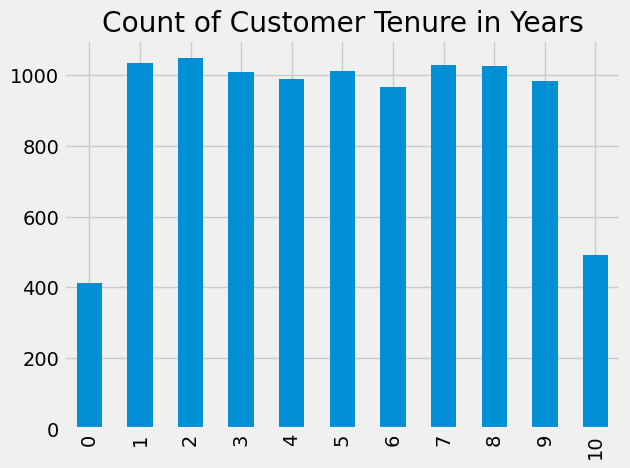

In [17]:
#tenure
df['tenure'].value_counts().sort_index().plot(kind='bar', title='Count of Customer Tenure in Years');
#tenure split fairly equally across years 1 to 9, with significantly less with less than one year tenure or ten years or more. 

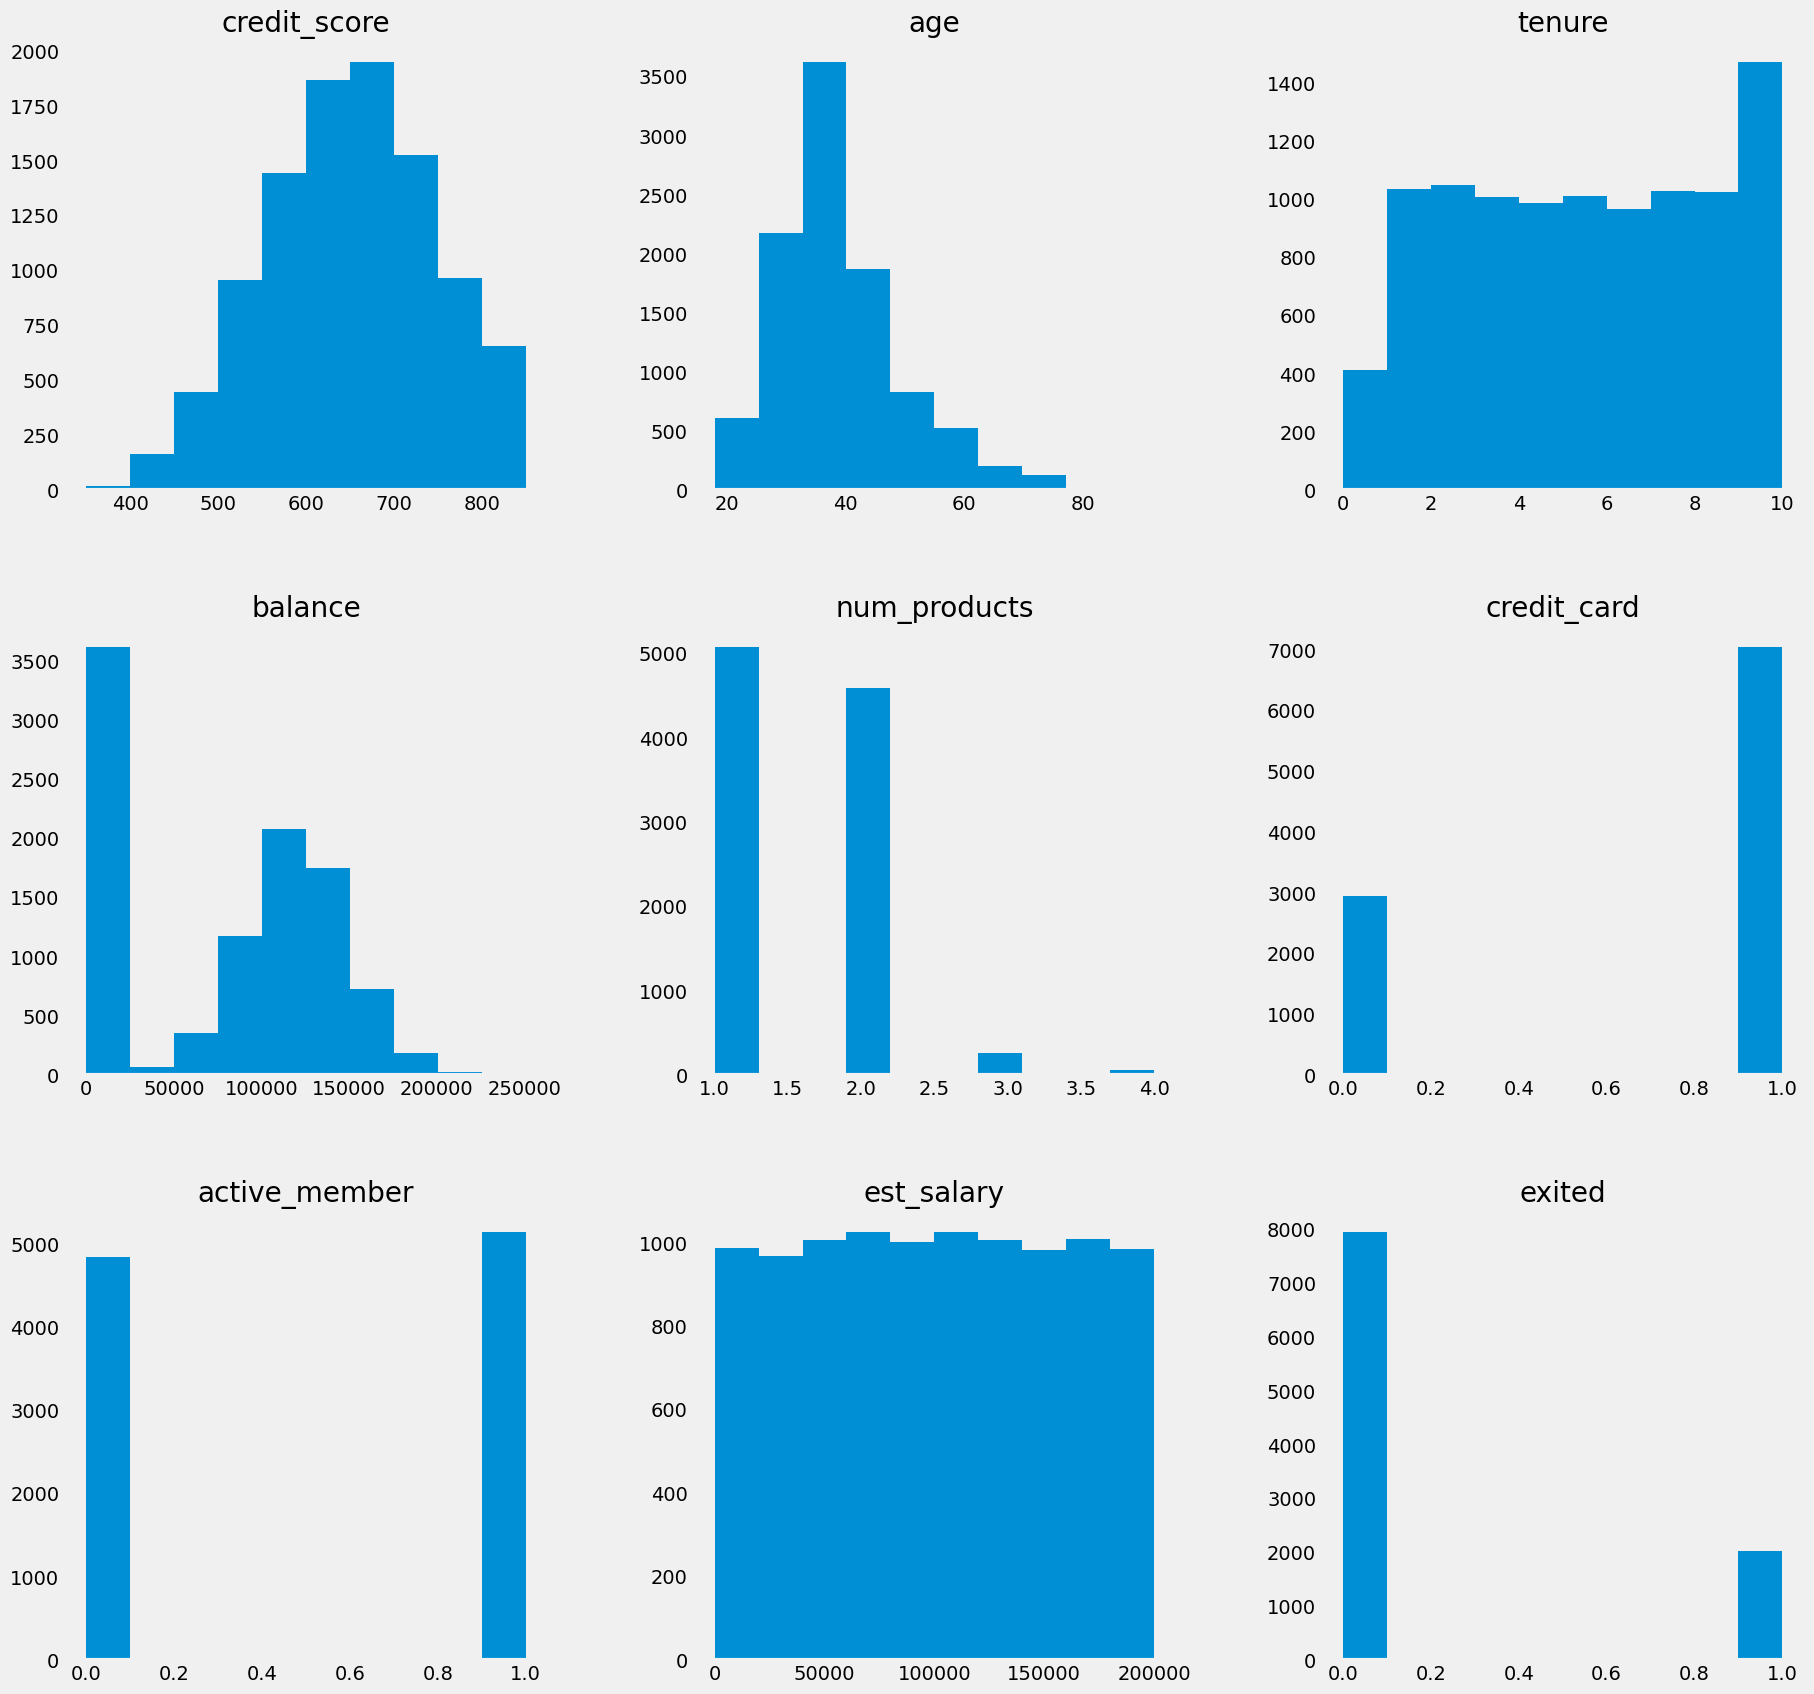

In [18]:
#general one stop shop look across all numerical values:
df.hist(figsize=(20,20), grid=False);

### Numerical Attribute Observations:

* Numerical values are all valid:
    * Credit scores have a reasonble range with no negative values.
    * Age values are all reasonable. 
    * Tenure and Number of Products have reasonable values. 
    * Credit card, active member and exited have unique values of 1 and 0 so can be treated as boolean for our analysis and modelling. 

In [19]:
#check for erroneous values in object attributes:

df.describe(include='O')

cust_id surname geography gender
count      10000   10000     10000  10000
unique     10000    2932         3      2
top     15634602   Smith    France   Male
freq           1      32      5014   5457

In [20]:
obj_check_cols = ['geography', 'gender']

for i in obj_check_cols:
    print(f"unique values for {i}: {df[i].unique()}")


unique values for geography: ['France' 'Spain' 'Germany']
unique values for gender: ['Female' 'Male']


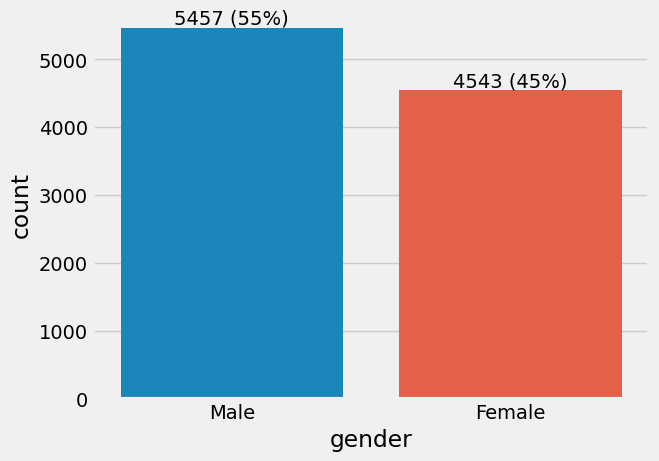

In [21]:
#gender:

def cplt_display_vals(df: pd.DataFrame, attribute: str):
    """
    function for displaying countplots for an attribute with absolute and relative value labels. 
    """

    plot = sns.countplot(
        x=df[attribute],
        #always highest to lowest:
        order=df[attribute].value_counts(ascending=False).index);
    
    abs_values = df[attribute].value_counts(ascending=False)
    rel_values = df[attribute].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
    plot.bar_label(container=plot.containers[0], labels=lbls);

cplt_display_vals(df=df, attribute='gender')

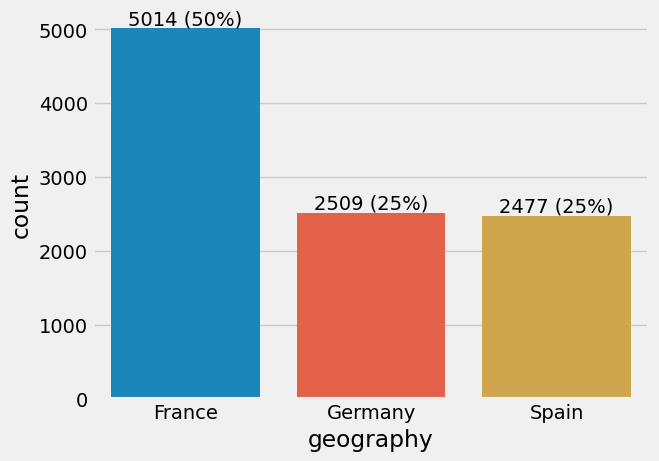

In [22]:
#geography
cplt_display_vals(df=df, attribute='geography')

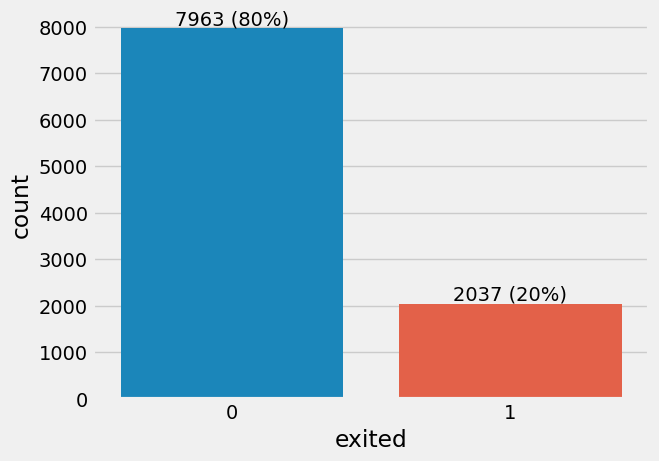

In [23]:
#exited
cplt_display_vals(df=df, attribute='exited')

In [24]:
df.head()

cust_id   surname  credit_score geography  gender  age  tenure    balance  \
0  15634602  Hargrave           619    France  Female   42       2       0.00   
1  15647311      Hill           608     Spain  Female   41       1   83807.86   
2  15619304      Onio           502    France  Female   42       8  159660.80   
3  15701354      Boni           699    France  Female   39       1       0.00   
4  15737888  Mitchell           850     Spain  Female   43       2  125510.82   

   num_products  credit_card  active_member  est_salary  exited  
0             1            1              1   101348.88       1  
1             1            0              1   112542.58       0  
2             3            1              0   113931.57       1  
3             2            0              0    93826.63       0  
4             1            1              1    79084.10       0

## Bivariate Analysis:


### Initial Analysis of Churned Customer Outcome Against other attributes: 

In [25]:
pd.options.plotting.backend = "plotly"

exited_exclusions = ['cust_id','surname','exited']
churn_numerical_cols = [x for x in df.columns if x not in exited_exclusions]

for col in churn_numerical_cols:
    exit_graph = df.plot(kind='hist', x=col, color='exited', title=f"{col} by Churn Result")
    exit_graph.show()

In [26]:
pd.set_option('display.max_rows', None)
df.groupby('exited').describe().T

exited                           0              1
credit_score  count    7963.000000    2037.000000
              mean      651.853196     645.351497
              std        95.653837     100.321503
              min       405.000000     350.000000
              25%       585.000000     578.000000
              50%       653.000000     646.000000
              75%       718.000000     716.000000
              max       850.000000     850.000000
age           count    7963.000000    2037.000000
              mean       37.408389      44.837997
              std        10.125363       9.761562
              min        18.000000      18.000000
              25%        31.000000      38.000000
              50%        36.000000      45.000000
              75%        41.000000      51.000000
              max        92.000000      84.000000
tenure        count    7963.000000    2037.000000
              mean        5.033279       4.932744
              std         2.880658       2.936106
              min         0.000000       0.000000
              25%         3.000000       2.000000
              50%         5.000000       5.000000
              75%         7.000000       8.000000
              max        10.000000      10.000000
balance       count    7963.000000    2037.000000
              mean    72745.296779   91108.539337
              std     62848.040701   58360.794816
              min         0.000000       0.000000
              25%         0.000000   38340.020000
              50%     92072.680000  109349.290000
              75%    126410.280000  131433.330000
              max    221532.800000  250898.090000
num_products  count    7963.000000    2037.000000
              mean        1.544267       1.475209
              std         0.509536       0.801521
              min         1.000000       1.000000
              25%         1.000000       1.000000
              50%         2.000000       1.000000
              75%         2.000000       2.000000
              max         3.000000       4.000000
credit_card   count    7963.000000    2037.000000
              mean        0.707146       0.699067
              std         0.455101       0.458776
              min         0.000000       0.000000
              25%         0.000000       0.000000
              50%         1.000000       1.000000
              75%         1.000000       1.000000
              max         1.000000       1.000000
active_member count    7963.000000    2037.000000
              mean        0.554565       0.360825
              std         0.497045       0.480358
              min         0.000000       0.000000
              25%         0.000000       0.000000
              50%         1.000000       0.000000
              75%         1.000000       1.000000
              max         1.000000       1.000000
est_salary    count    7963.000000    2037.000000
              mean    99738.391772  101465.677531
              std     57405.586966   57912.418071
              min        90.070000      11.580000
              25%     50783.490000   51907.720000
              50%     99645.040000  102460.840000
              75%    148609.955000  152422.910000
              max    199992.480000  199808.100000

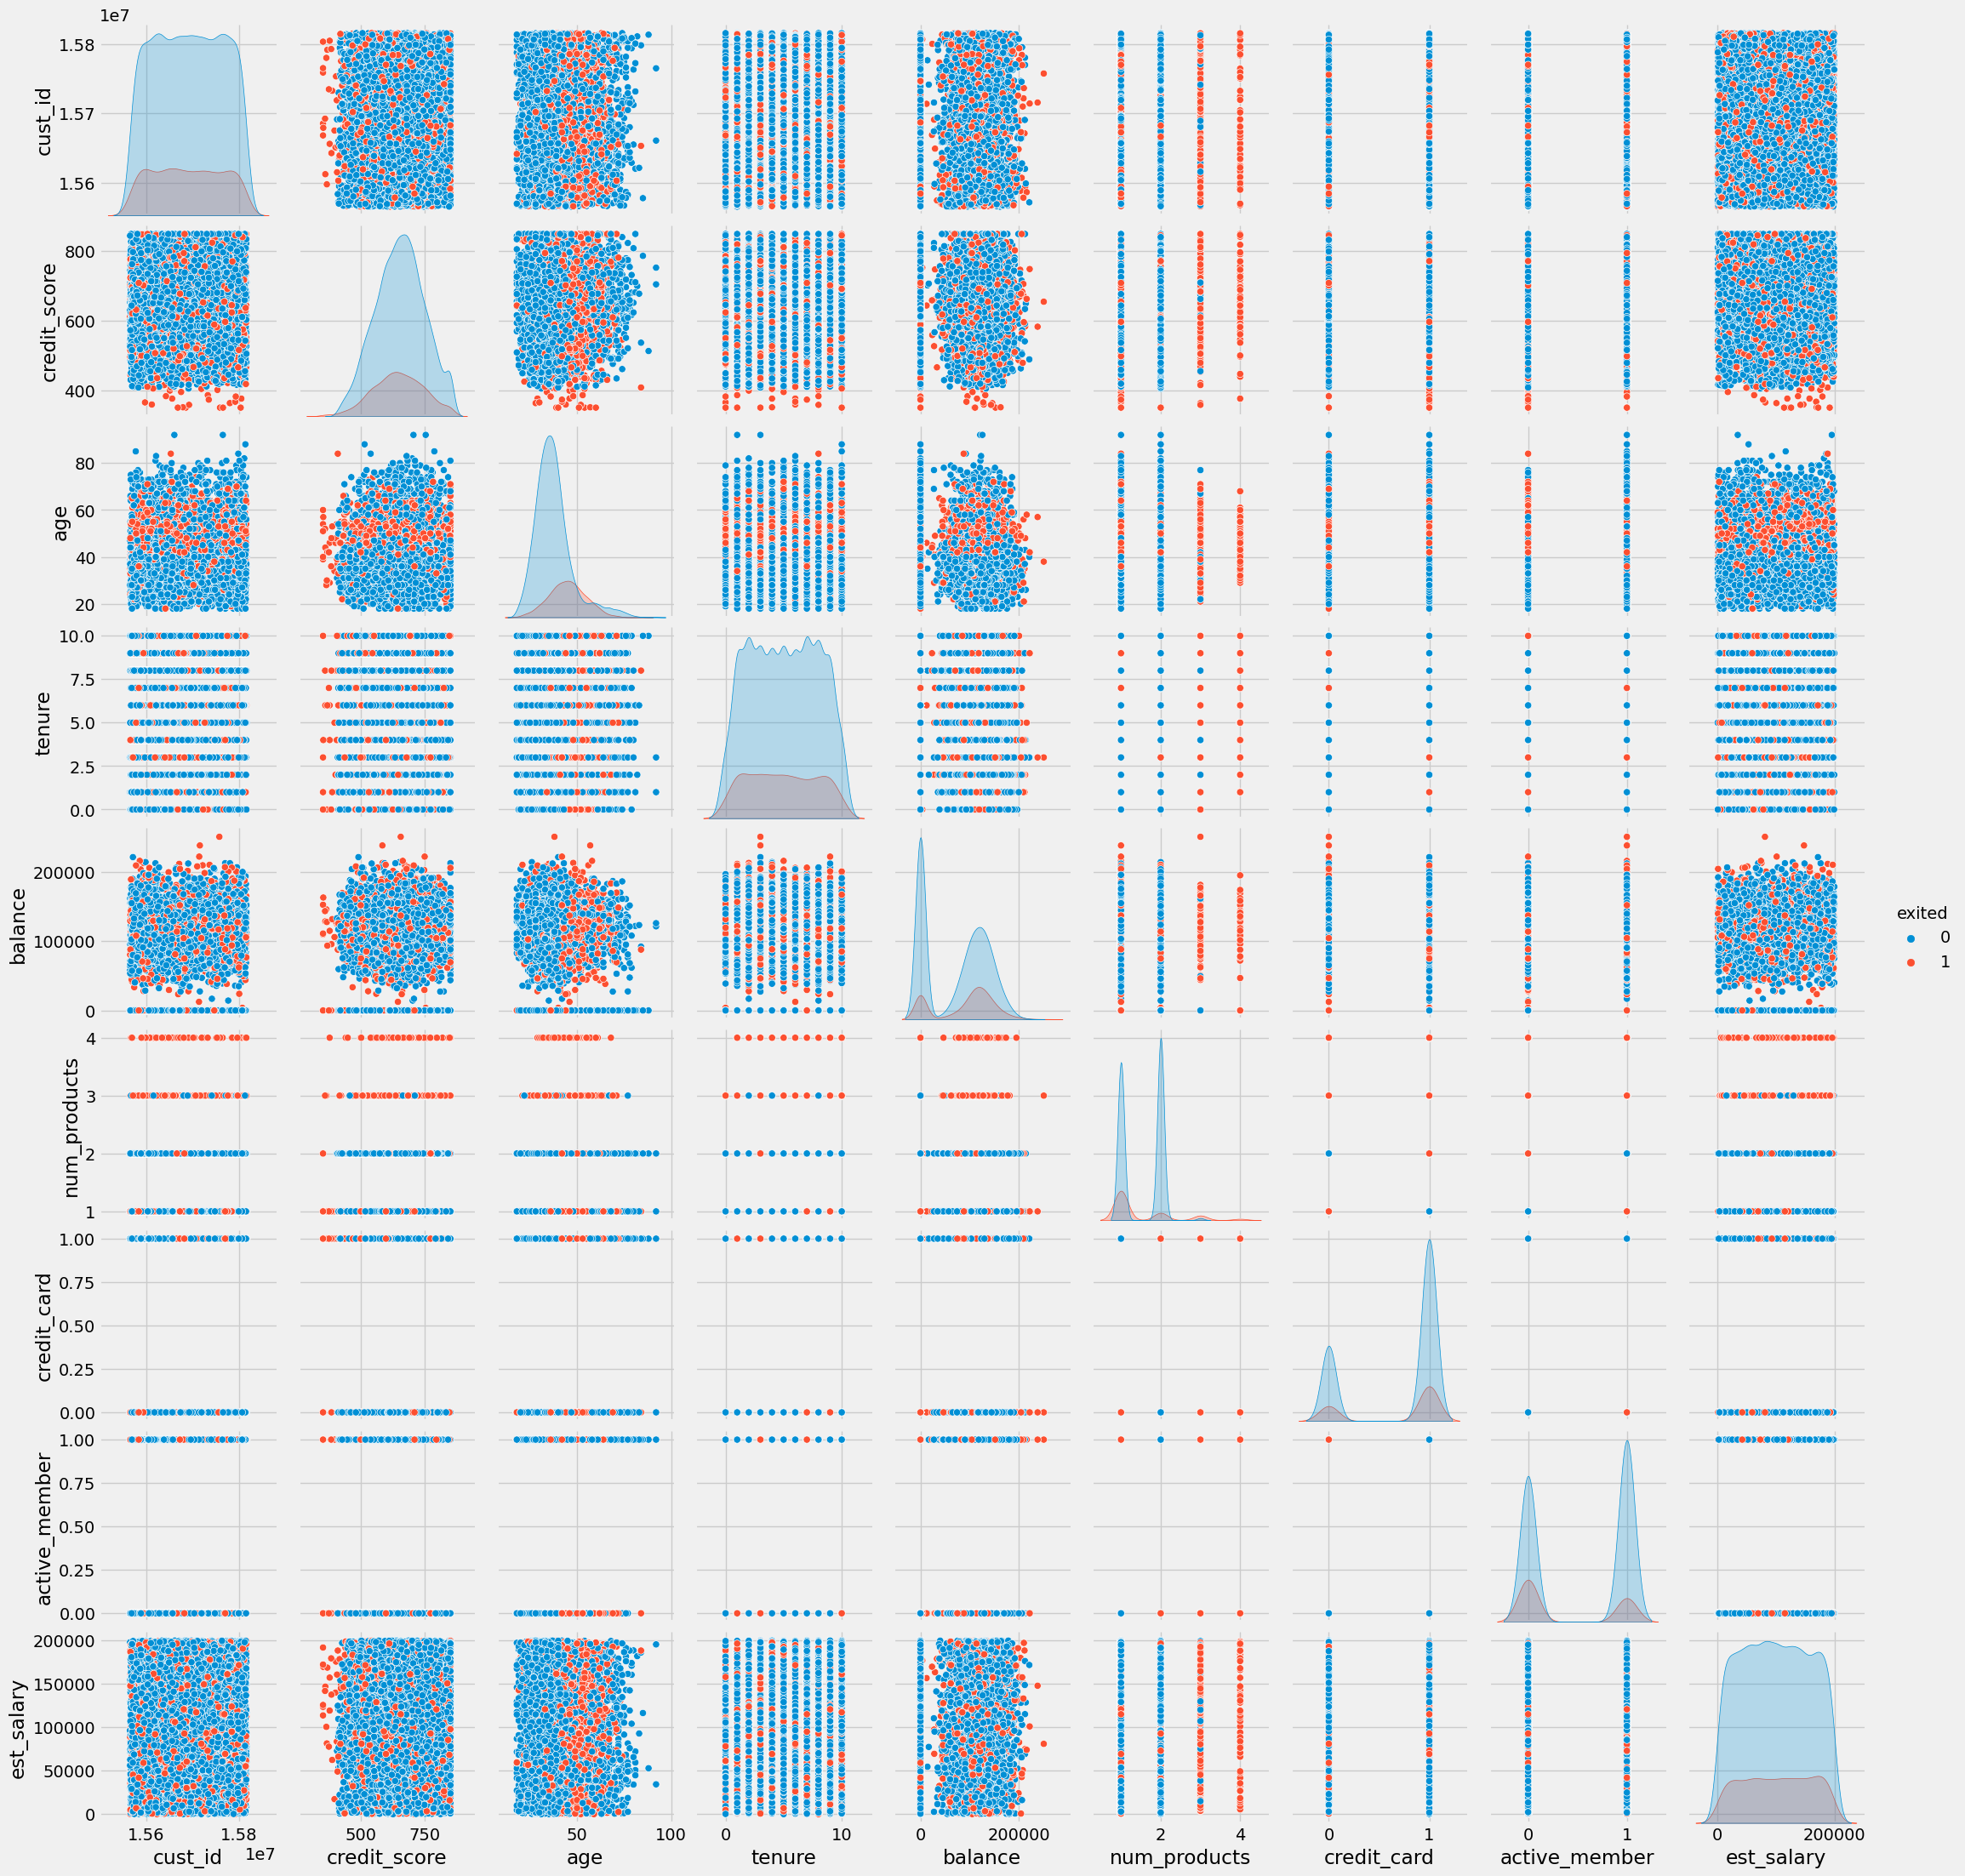

In [27]:
#sns.boxplot(data=df, y='est_salary', x='exited');
sns.pairplot(data=df, hue="exited"); #takes time to run

### Correlation:

C:\Users\DanWi\AppData\Local\Temp\ipykernel_46696\946078722.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



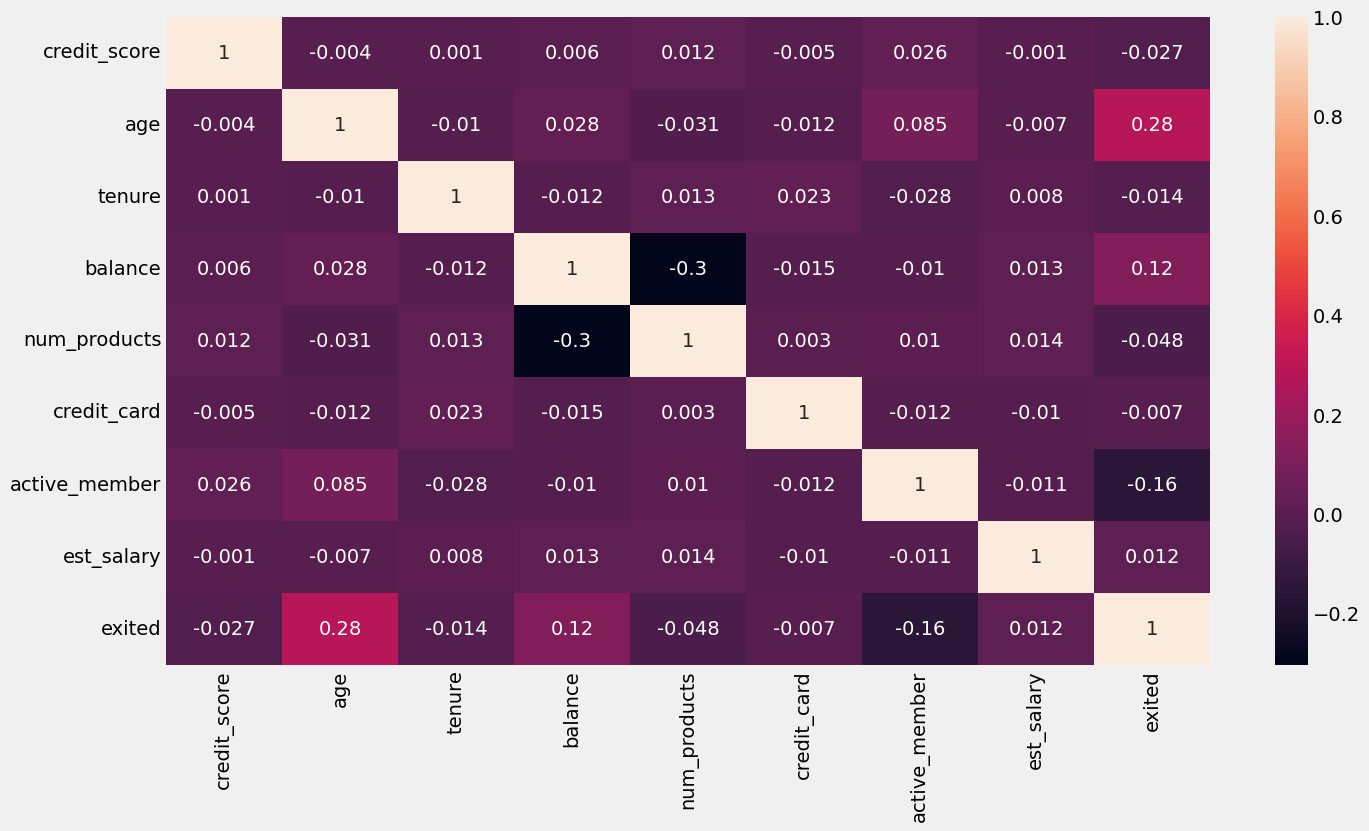

In [28]:
corr = df.corr().round(3)

plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True);

In [29]:
df.head()

cust_id   surname  credit_score geography  gender  age  tenure    balance  \
0  15634602  Hargrave           619    France  Female   42       2       0.00   
1  15647311      Hill           608     Spain  Female   41       1   83807.86   
2  15619304      Onio           502    France  Female   42       8  159660.80   
3  15701354      Boni           699    France  Female   39       1       0.00   
4  15737888  Mitchell           850     Spain  Female   43       2  125510.82   

   num_products  credit_card  active_member  est_salary  exited  
0             1            1              1   101348.88       1  
1             1            0              1   112542.58       0  
2             3            1              0   113931.57       1  
3             2            0              0    93826.63       0  
4             1            1              1    79084.10       0

## Outlier Detection and Removal:

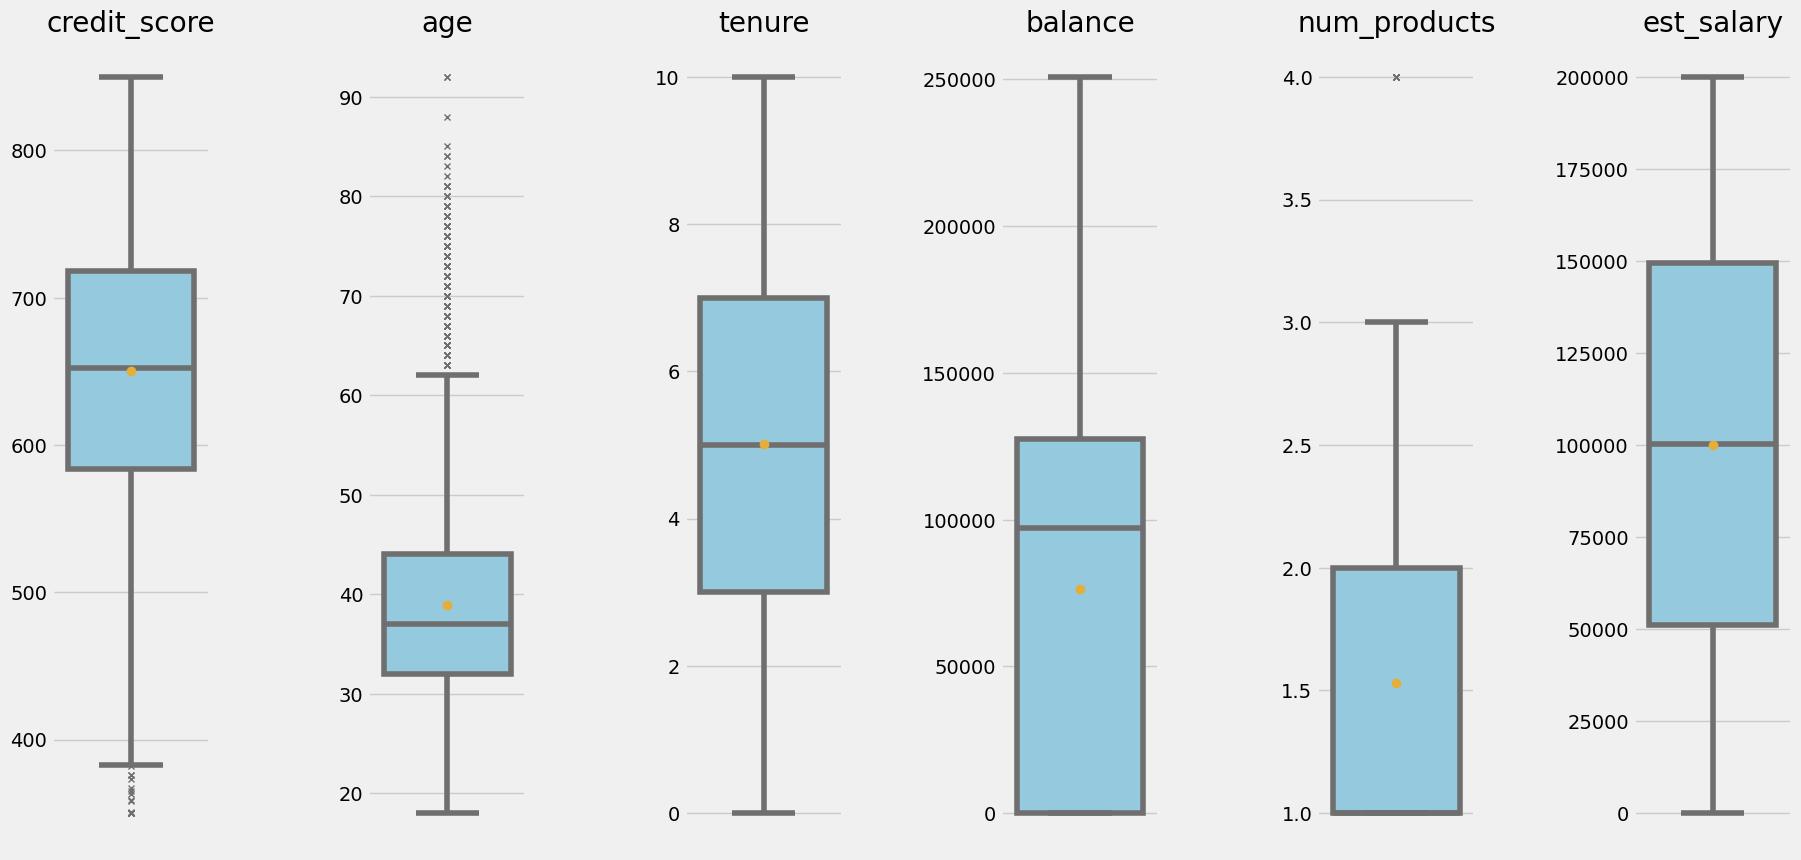

In [30]:
#TODO - build into a function
boxplot_cols = ['credit_score', 'age', 'tenure', 'balance', 'num_products', 'est_salary']

fig, axs = plt.subplots(1, len(boxplot_cols), figsize=(20,10))

for i, (ax, attribute) in enumerate(zip(axs.flat, boxplot_cols)):
    sns.boxplot(y=df[attribute], ax=ax, color='skyblue', showmeans=True,  
            meanprops={"marker":"o"},
           flierprops={'marker':'x'})
    
    ax.set_title(boxplot_cols[i])
    ax.set_ylabel('')
    
plt.subplots_adjust(hspace=0.25, wspace=1)
plt.show()


In [31]:
#create new dataframe for outlier removal, so we can use the df to compare later. 
df_n_o = df.copy()

In [32]:
#use IQR outlier method to remove any outlier records from dataframe. 

def calculate_boundaries(col: pd.Series) -> dict:
  lower_quartile = np.percentile(col, 25)
  upper_quartile = np.percentile(col, 75)
  iqr = np.subtract(*np.percentile(col, [75, 25]))
  lower_boundary = lower_quartile - (1.5*iqr)
  upper_boundary = upper_quartile + (1.5*iqr)

  boundaries = {
     'lower_boundary': lower_boundary,
     'upper_boundary': upper_boundary
  }

  return boundaries
  

def remove_iqr_outliers(df: pd.DataFrame, columns: list) -> pd.DataFrame:
   for col in columns:
      print(col)
      boundaries = calculate_boundaries(df[col])
      #get values to easily use in pd query:
      #lower 
      #upper = boundaries['upper_boundary']
      df = df[df[col].between(boundaries['lower_boundary'], boundaries['upper_boundary'], inclusive='both')]
      #df = df[((df[col] > lower) & (df[col] < upper))]
   return df

#removing outliers based off age only to keep a higher number of labels for training data (e.g. num products of 4 exited in most cases). 
df_n_o = remove_iqr_outliers(df_n_o, ['age'])

#models will be trained and tested on original dataset without outliers for comaprison. 
#future work includes using multiple outlier removal methods. 
       

age


In [33]:
df_n_o.head()

cust_id   surname  credit_score geography  gender  age  tenure    balance  \
0  15634602  Hargrave           619    France  Female   42       2       0.00   
1  15647311      Hill           608     Spain  Female   41       1   83807.86   
2  15619304      Onio           502    France  Female   42       8  159660.80   
3  15701354      Boni           699    France  Female   39       1       0.00   
4  15737888  Mitchell           850     Spain  Female   43       2  125510.82   

   num_products  credit_card  active_member  est_salary  exited  
0             1            1              1   101348.88       1  
1             1            0              1   112542.58       0  
2             3            1              0   113931.57       1  
3             2            0              0    93826.63       0  
4             1            1              1    79084.10       0

## Data Prep For Modelling

In [34]:
#drop unrequired columns:
def bc_drop_cols(df: pd.DataFrame, cols: list) -> pd.DataFrame:
    df = df.drop(columns=cols)
    return df

df_n_o = bc_drop_cols(df=df_n_o, cols=['cust_id', 'surname'])
#df = bc_drop_cols(df=df, cols=['cust_id', 'surname'])

df_n_o.head()

credit_score geography  gender  age  tenure    balance  num_products  \
0           619    France  Female   42       2       0.00             1   
1           608     Spain  Female   41       1   83807.86             1   
2           502    France  Female   42       8  159660.80             3   
3           699    France  Female   39       1       0.00             2   
4           850     Spain  Female   43       2  125510.82             1   

   credit_card  active_member  est_salary  exited  
0            1              1   101348.88       1  
1            0              1   112542.58       0  
2            1              0   113931.57       1  
3            0              0    93826.63       0  
4            1              1    79084.10       0

In [35]:
#keep a df without dummies for clustering analysis later:
df_n_o_base = df_n_o.copy()


#encode categorical variables:

#drop first to reuce attributes in dataframe.
df_n_o = pd.get_dummies(df_n_o, drop_first=True)

In [36]:
df_n_o.head()

credit_score  age  tenure    balance  num_products  credit_card  \
0           619   42       2       0.00             1            1   
1           608   41       1   83807.86             1            0   
2           502   42       8  159660.80             3            1   
3           699   39       1       0.00             2            0   
4           850   43       2  125510.82             1            1   

   active_member  est_salary  exited  geography_Germany  geography_Spain  \
0              1   101348.88       1                  0                0   
1              1   112542.58       0                  0                1   
2              0   113931.57       1                  0                0   
3              0    93826.63       0                  0                0   
4              1    79084.10       0                  0                1   

   gender_Male  
0            0  
1            0  
2            0  
3            0  
4            0

In [37]:
#tts before scaling to avoid data linkage.
X = df_n_o.drop(columns = 'exited').copy()
y = df_n_o['exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

print("\n")

print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (7712, 11)
y_train:  (7712,)


X_test:  (1929, 11)
y_test:  (1929,)


In [38]:
X_test.head()

credit_score  age  tenure    balance  num_products  credit_card  \
2696           698   40       0   92053.44             1            1   
4178           510   32       1       0.00             2            0   
598            683   57       5  162448.69             1            0   
2386           541   46       4  124547.13             2            1   
5201           569   36       1   67087.69             1            1   

      active_member  est_salary  geography_Germany  geography_Spain  \
2696              1   143681.83                  0                1   
4178              1    28515.17                  0                0   
598               0     9221.78                  1                0   
2386              0    94499.06                  0                0   
5201              0   154775.70                  0                0   

      gender_Male  
2696            0  
4178            0  
598             0  
2386            1  
5201            1

In [39]:
scaling_columns = ['credit_score', 'age', 'tenure', 'balance', 'num_products', 'est_salary'] 

scaler = StandardScaler() #take data, subtract mean, divide by std dev

# fit and transform 
X_train_scaled_cols = scaler.fit_transform(X_train[scaling_columns])
X_train_scaled_cols = pd.DataFrame(X_train_scaled_cols, columns = X_train[scaling_columns].columns, index=X_train.index)

X_train_scaled = X_train.copy()

#replace unscaled with scaled
X_train_scaled.loc[:, scaling_columns] = X_train_scaled_cols[scaling_columns]
X_train_scaled.isna().mean()

# test data 
X_test_scaled_cols = scaler.transform(X_test[scaling_columns])
X_test_scaled_cols =  pd.DataFrame(X_test_scaled_cols, columns = X_test[scaling_columns].columns, index=X_test.index)

X_test_scaled = X_test.copy()

X_test_scaled.loc[:, scaling_columns] = X_test_scaled_cols[scaling_columns]
X_test_scaled.isna().mean()


credit_score         0.0
age                  0.0
tenure               0.0
balance              0.0
num_products         0.0
credit_card          0.0
active_member        0.0
est_salary           0.0
geography_Germany    0.0
geography_Spain      0.0
gender_Male          0.0
dtype: float64

In [40]:
#join back to original dataset
X_train_scaled.head()

credit_score       age    tenure   balance  num_products  credit_card  \
5929      0.510338 -0.658601 -0.702806 -1.220987      0.807427            1   
115      -0.225035 -0.885789  1.375961  0.894454      0.807427            1   
5379     -0.235393 -1.908136  0.683039  0.361271     -0.916038            1   
9371     -0.090389 -0.772195  1.375961  0.577080     -0.916038            1   
5713     -1.167556  1.045310  1.722423 -1.220987      0.807427            0   

      active_member  est_salary  geography_Germany  geography_Spain  \
5929              1    1.221473                  0                0   
115               1   -0.453948                  1                0   
5379              1    1.193484                  0                0   
9371              1   -1.181299                  0                0   
5713              1   -1.298351                  0                0   

      gender_Male  
5929            1  
115             0  
5379            0  
9371            1  
5713            1

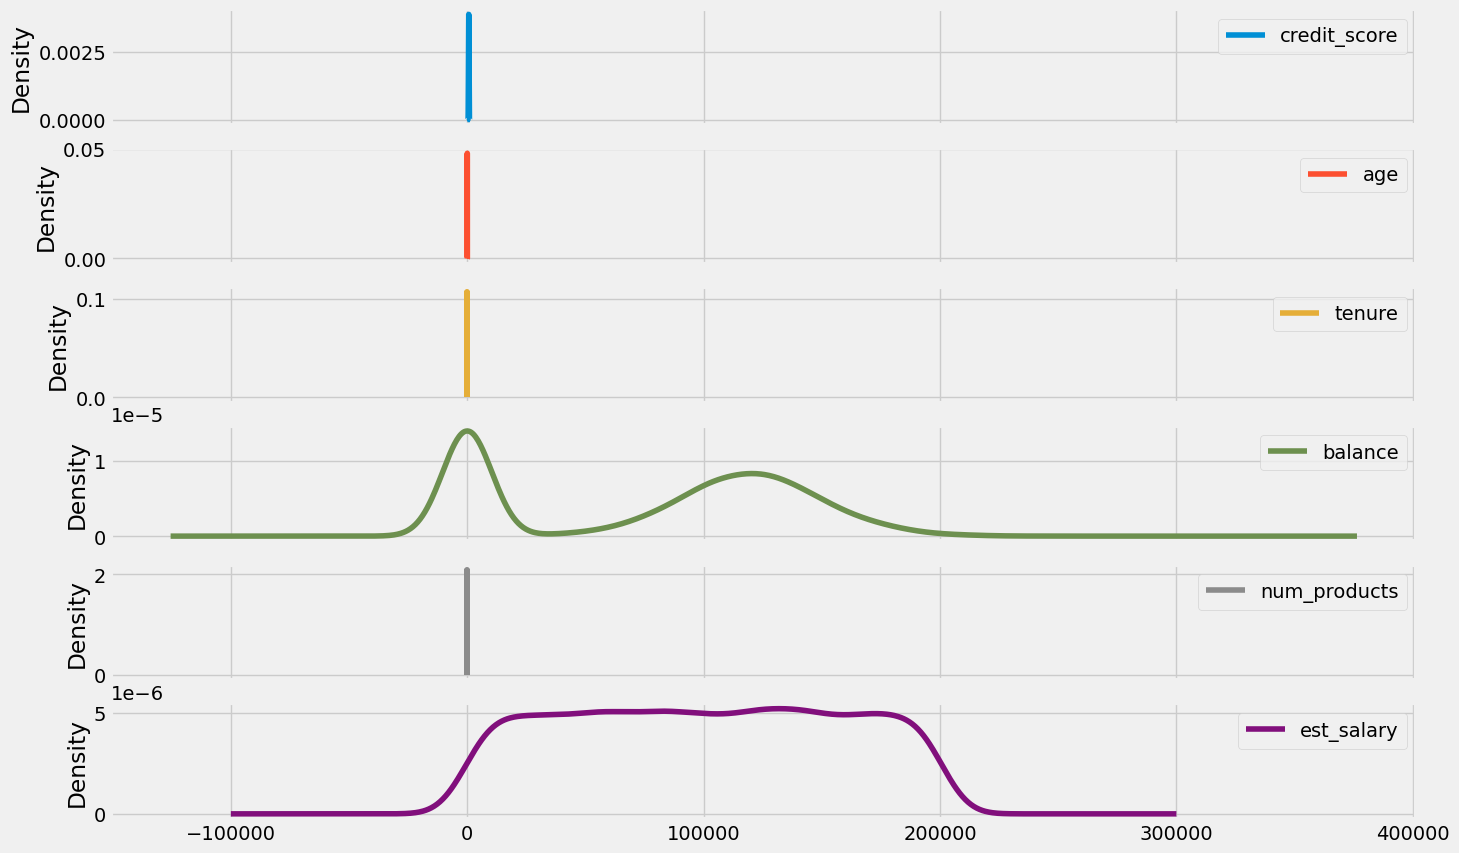

In [41]:
pd.options.plotting.backend = "matplotlib"
# #comparison of scaled and unscaled data:
X_train[scaling_columns].plot(kind='kde', subplots=True, figsize=(15,10));

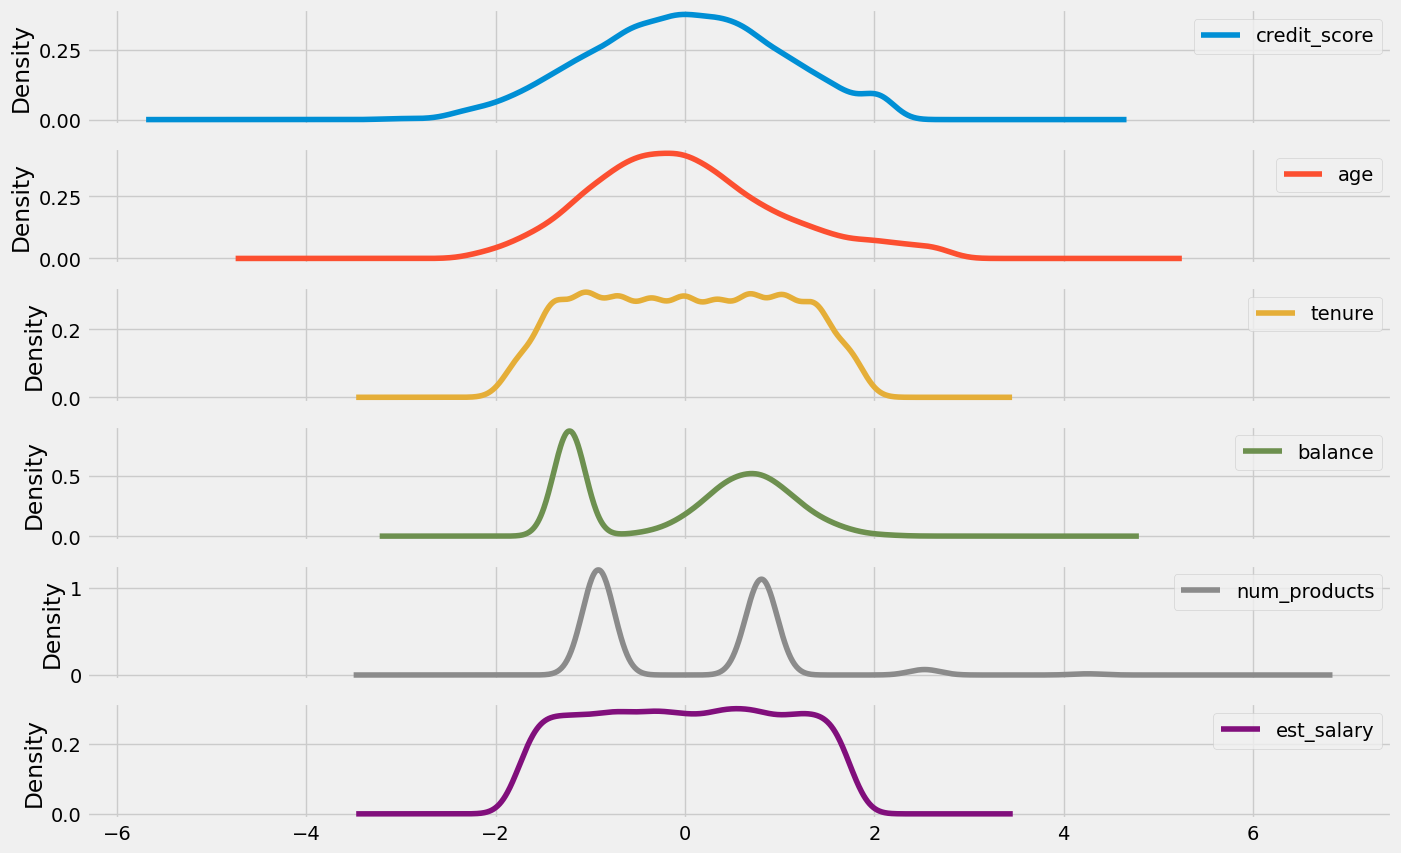

In [42]:
X_train_scaled[scaling_columns].plot(kind='kde', subplots=True, figsize=(15,10));

## Model Building - Classification:

### Dummy Classifier:

In [43]:
#use dummy classifier as a base for evaluating other models:

dummy = DummyClassifier()

dummy.fit(X_train_scaled, y_train)

print(f"The accuracy score of the model for Train is {dummy.score(X_train_scaled, y_train).round(3)}")

print(f"The accuracy score of the model for Test is {dummy.score(X_test_scaled, y_test).round(3)}")

The accuracy score of the model for Train is 0.794
The accuracy score of the model for Test is 0.805


### K-NN Classifier:

In [44]:
#scaled:
knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train)

print(f"The accuracy score of the model for Train is {knn.score(X_train_scaled, y_train).round(3)}")

print(f"The accuracy score of the model for Test is {knn.score(X_test_scaled, y_test).round(3)}")

The accuracy score of the model for Train is 0.881
The accuracy score of the model for Test is 0.853


In [45]:
#unscaled:
knn.fit(X_train, y_train)

print(f"The accuracy score of the model for Train is {knn.score(X_train, y_train).round(3)}")

print(f"The accuracy score of the model for Test is {knn.score(X_test, y_test).round(3)}")

The accuracy score of the model for Train is 0.813
The accuracy score of the model for Test is 0.773


## SVM Model

In [46]:
#scaled
svc = SVC()

# fit the model 
svc.fit(X_train_scaled, y_train)

print("The accuracy score of the model for Train is {:.2f}".format(svc.score(X_train_scaled, y_train)))

print("The accuracy score of the model for test is {:.2f}".format(svc.score(X_test_scaled, y_test)))

The accuracy score of the model for Train is 0.87
The accuracy score of the model for test is 0.86


In [47]:
#scaled
svc = SVC()

# fit the model 
svc.fit(X_train, y_train)

print("The accuracy score of the model for Train is {:.2f}".format(svc.score(X_train, y_train)))

print("The accuracy score of the model for test is {:.2f}".format(svc.score(X_test, y_test)))



The accuracy score of the model for Train is 0.79
The accuracy score of the model for test is 0.81


## Decision Tree Classifier:

The accuracy score of the model for Train is 1.00
The accuracy score of the model for test is 0.79


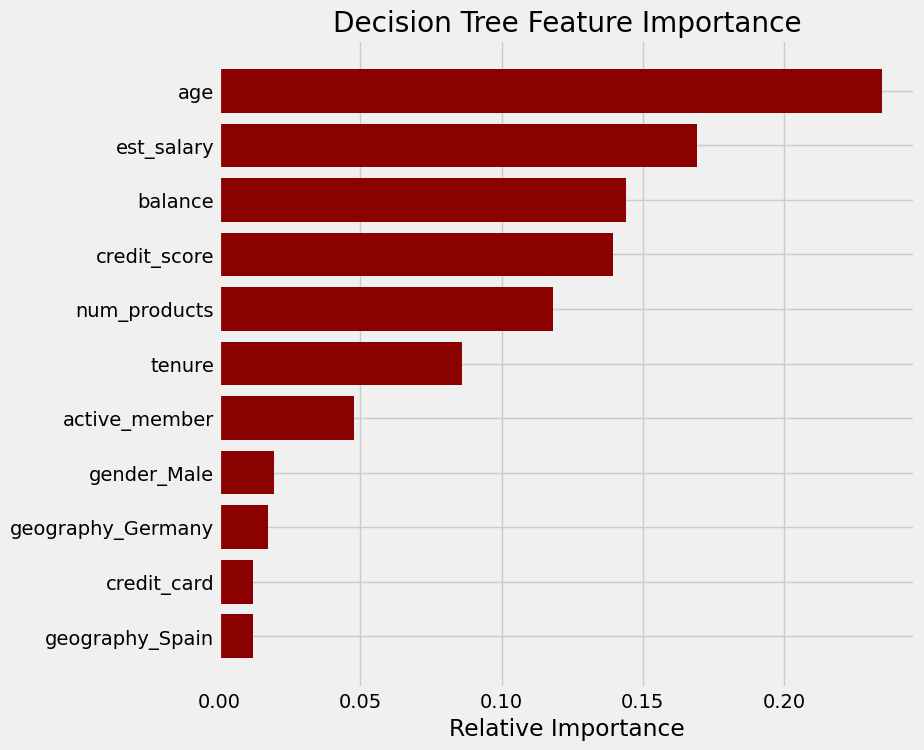

In [48]:
# call the model
dt = DecisionTreeClassifier()

# fit the model - scaling not required 
dt.fit(X_train, y_train)

print("The accuracy score of the model for Train is {:.2f}".format(dt.score(X_train, y_train)))

print("The accuracy score of the model for test is {:.2f}".format(dt.score(X_test, y_test)))

#feature importance:
# list of column name
feature_names = list(X_train.columns)

# get the importance from the model
importances = dt.feature_importances_

# placement
indices = np.argsort(importances)

# plotting the figure
plt.figure(figsize=(8, 8))
plt.title("Decision Tree Feature Importance")

plt.barh(range(len(indices)), importances[indices], color="darkred", align="center")

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")

plt.show()


## Random Forest Classifier:

In [49]:
# call the model 
rf = RandomForestClassifier()

# fit the model 
rf.fit(X_train, y_train)

print("The accuracy score of the model for Train is {:.2f}".format(rf.score(X_train, y_train)))

print("The accuracy score of the model for test is {:.2f}".format(rf.score(X_test, y_test)))

The accuracy score of the model for Train is 1.00
The accuracy score of the model for test is 0.87


In [50]:
# do a minimum of 5 models in classification. 

# smote for class imbalance, oversampleing and undersampling too. 

# train test split - y is the target variable. test_size: focus on this. use 0.2 for test in this case. 
# we ultimately evaluate how well the model performs on the test data, the best test data 

# should do a validation split as this is what's done in practice. 

## Model Building - Clustering for EDA and Customer Understanding:

c:\projects\py_course_venv\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\projects\py_course_venv\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\projects\py_course_venv\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\projects\py_course_venv\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\projects\py_course_venv\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: Future

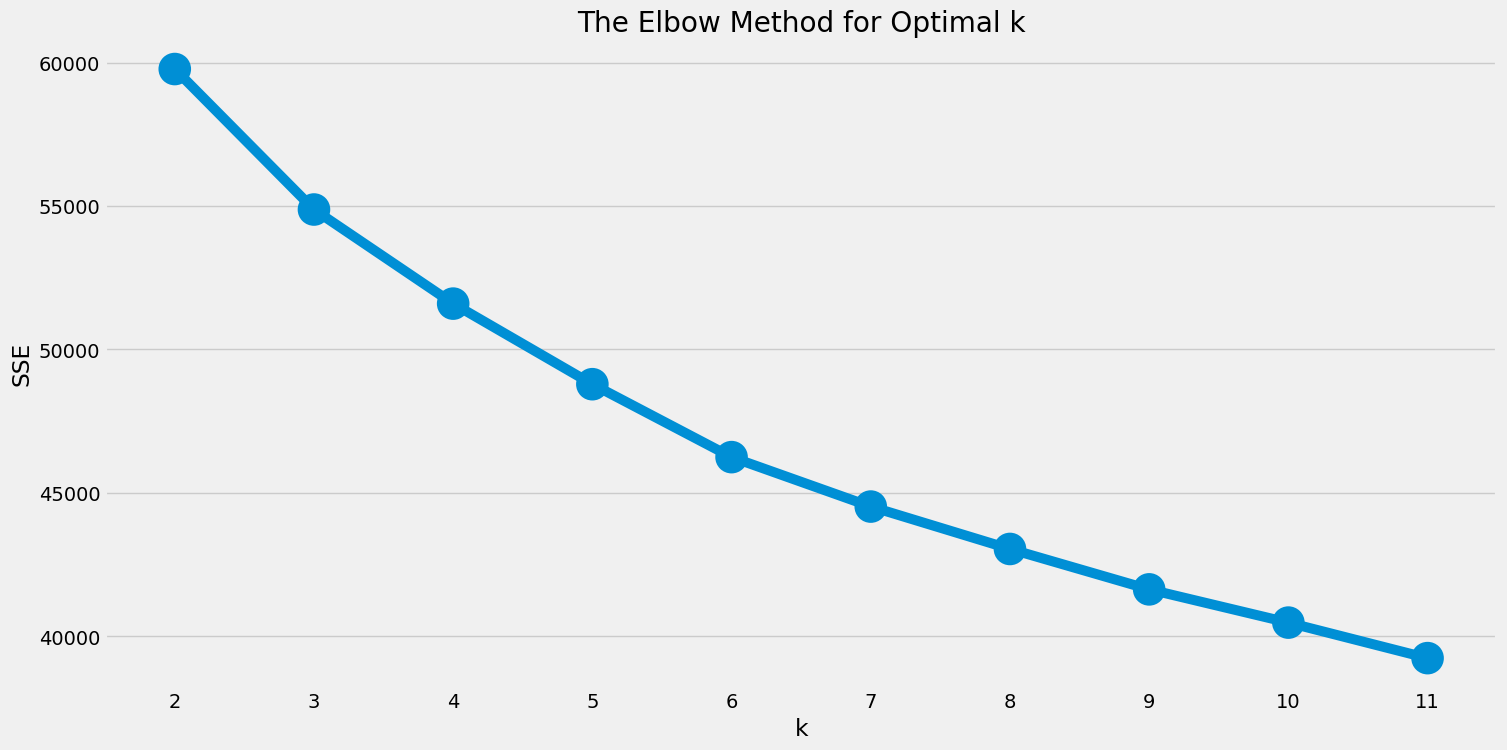

In [51]:
# take scaled data and add targe back to create df:
x_data = pd.concat([X_train_scaled, X_test_scaled], axis=0)
y_data = pd.concat([y_train, y_test], axis=0)
df_kmeans = x_data.merge(y_data, left_index=True, right_index=True)

sse = {}

for k in range(2,12):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_kmeans)
    sse[k] = kmeans.inertia_

#produce an elbow chart to decide on optimal K:
plt.figure(figsize=(16,8))
plt.title('The Elbow Method for Optimal k')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()));




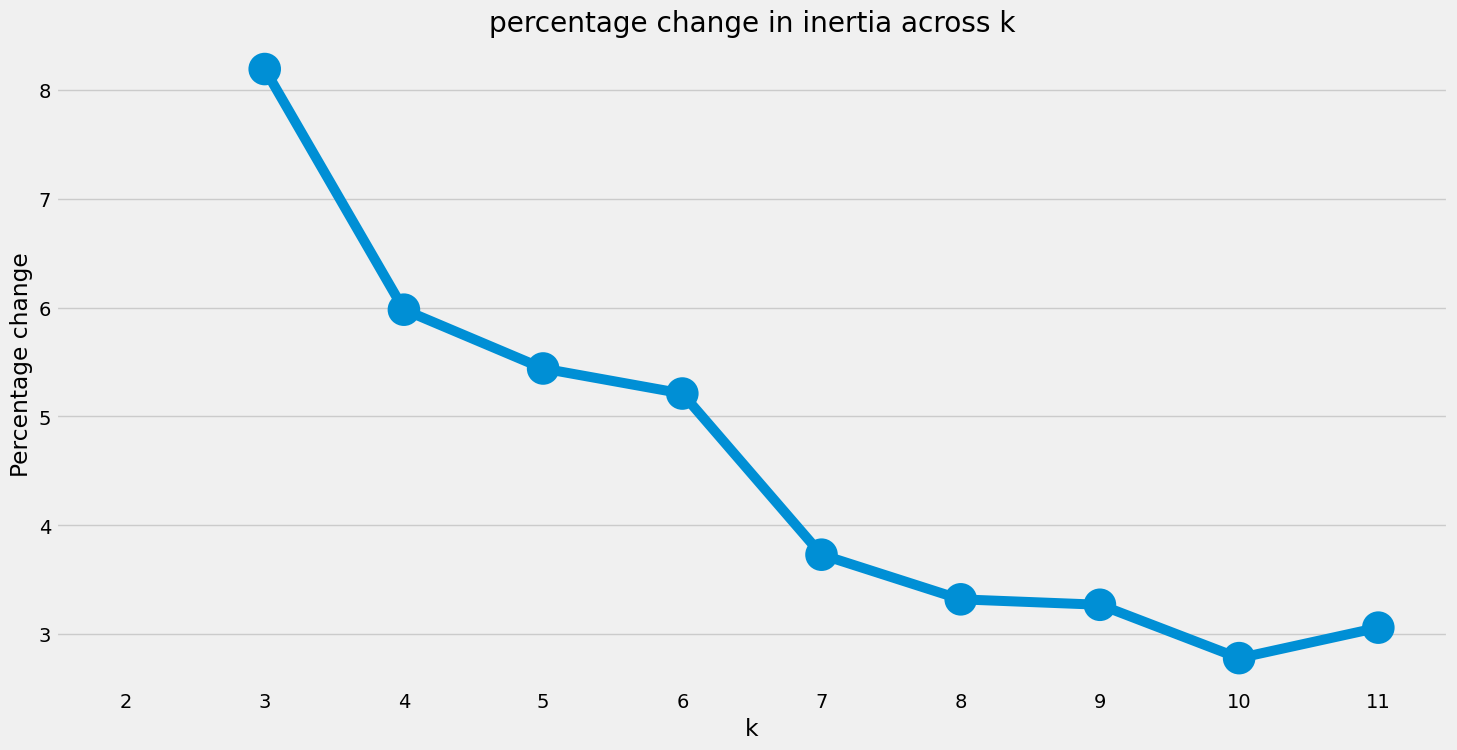

In [52]:
# elbow isnt clear so use the % change in intertia to decide on optimal K. 

# understand the change in elbow methods:
inertia_df = pd.DataFrame(sse, index=range(0, len(sse)))
inertia_df = inertia_df.drop_duplicates().T
inertia_df['pct_change'] = inertia_df.pct_change().round(4).multiply(-100)
inertia_df = inertia_df.reset_index()
inertia_df

#visualise percentage change. 
plt.figure(figsize=(16,8))

#plot the chart:
sns.pointplot(x = inertia_df['index'], y = inertia_df['pct_change'])

#format chart:
plt.title('percentage change in inertia across k')
plt.xlabel('k')
plt.ylabel('Percentage change');


In [53]:
# use 4 clusters based on percetage change:
kmean = KMeans(n_clusters=4, random_state=0)
kmean.fit(df_kmeans)

df_kmeans['cluster'] = kmean.labels_

c:\projects\py_course_venv\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



### Cluster Understanding:

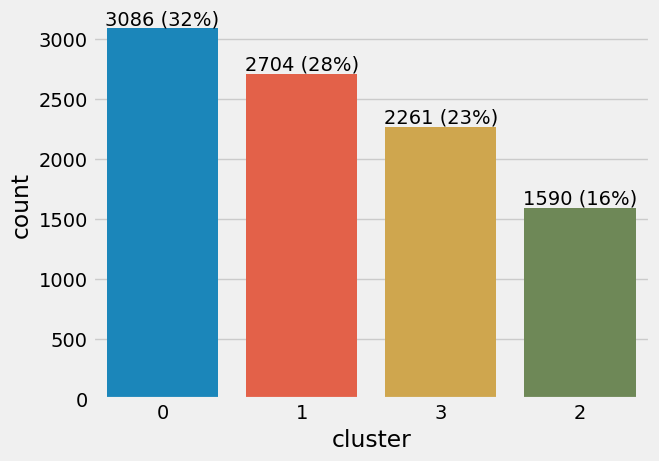

In [54]:
cplt_display_vals(df=df_kmeans, attribute='cluster')

#

In [59]:
#rejoin clustered data to non-scaled data. 
df_n_o_base['cluster'] = df_kmeans['cluster']

df_cluster_grouped = df_n_o_base.groupby('cluster')

In [60]:
df_n_o_base.head()

credit_score geography  gender  age  tenure    balance  num_products  \
0           619    France  Female   42       2       0.00             1   
1           608     Spain  Female   41       1   83807.86             1   
2           502    France  Female   42       8  159660.80             3   
3           699    France  Female   39       1       0.00             2   
4           850     Spain  Female   43       2  125510.82             1   

   credit_card  active_member  est_salary  exited  cluster  
0            1              1   101348.88       1        2  
1            0              1   112542.58       0        1  
2            1              0   113931.57       1        3  
3            0              0    93826.63       0        0  
4            1              1    79084.10       0        1

In [61]:
#aggregate various attributes per cluster to understand general cluster differences:
df_cluster_grouped.agg({
    'credit_score':'mean',
    'age':'mean',
    'tenure':'mean',
    'balance':'mean',
    'num_products':'mean',
    'credit_card':'mean',
    'active_member':'mean',
    'est_salary':'mean',
    'exited':'mean'
})

credit_score        age    tenure        balance  num_products  \
cluster                                                                   
0          650.254051  35.646468  5.143552    7080.674469      1.979909   
1          655.460059  34.518491  2.525888  116931.757319      1.326183   
2          634.756604  51.553459  4.828302   86164.301623      1.305031   
3          655.069438  34.956656  7.949138  116358.147351      1.321981   

         credit_card  active_member     est_salary    exited  
cluster                                                       
0           0.712573       0.497408   99479.415804  0.109203  
1           0.694157       0.526627  100852.497149  0.135725  
2           0.696226       0.513208   99046.962472  0.567296  
3           0.714728       0.475896  101096.423361  0.158337

credit_score       age    tenure   balance  num_products  credit_card  \
5929      0.510338 -0.658601 -0.702806 -1.220987      0.807427            1   

      active_member  est_salary  geography_Germany  geography_Spain  \
5929              1    1.221473                  0                0   

      gender_Male  exited  cluster  
5929            1       0        0